# ADS 2017. Homework 1

This notebook was uploaded by Julián Ferreiro (NetID: jif245). The notebook was done in collaboration with Juan Sokoloff (NetID jss895). We contributed equally to the solution of the homework.

NOTE:
For proper functioning of the notebook, it is assumed that the extra files are in the same directory as the notebook.

### Question (1): (10pt)

Suppose that the independent variable $x$ has n observations: $(x_1,x_2,...x_n)$ and the dependent variable $y$ has corresponding observations: $(y_1, y_2,...,y_n)$. If the correlation between these two sequences $corr(x,y)=0.02$, which of the following statements are true? Please select all the right answers.

(a) There should be no strong relation between $x$ and $y$.

(b) If we build a linear regression between $y$ and $x$ as $y=wx$, we could conclude that the OLS estimation for $w$ should be around 0.02.

(c) There could be some strong linear relationship between $x$ and $y$.

(d) Certain relation between $x$ and $y$ could still exist, but it should be non-linear.

##### Answers:
(a) is True.


### Question (2): (10pt)



Consider a model

$y=x^{b}$ where $b>0$. 

Now, suppose x triples (originally $x>0$). How would y change with respect to this change of x? Let us denote new $y$ as $y'$. Please select all the right answers from below. 

(a) $y'<3y$ if b is less than one.

(b) $y'=3y$ in any case.

(c) $y'$ increases by $(2^b-1)*100\%$.

(d) $y'>3y$ if b is bigger than one.

##### Answers:
(a) is True



In [1]:
#Testing the model
b=5
x=2

y=x**b
y1=(3*x)**b

print("this is y",3*y)
print ("this is 3y",y1)
print ((2**b)-1)*100,"%"
print (y1-y)/y

('this is y', 96)
('this is 3y', 7776)
3100 %
242


In [2]:
#Importing all the package needed for the answers.
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%matplotlib inline

### Question (3): (30 pt)


In [3]:
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [4]:
y=[14.0, 12.0, 18.0, -4.0, 14.0, 35.0, 45.0, 30.0, 50.0, 54.0, 58.0, 
   55.0, 57.0, 62.0, 61.0, 83.0, 85.0, 106.0, 105.0, 104.0]

#### (a) Calculate corr(x,y) without using a build-in function for the correlation coefficient.

To calculate covariance:

$ S_{xy} = \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) $

In [5]:
#Creating arrays from listss
x=np.asarray(x)
y=np.asarray(y)

#creating an array with both lists
#source: class 2 notebook
data=pd.DataFrame([x,y]).T

data.columns=["x","y"]

#Calculate mean of each group of numbers
x_mean=x.mean()
y_mean=y.mean()

#calculating covariance
cov=np.sum((x-x_mean)*(y-y_mean))/(len(x))

#### To calculate the correlation:

$ \rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y} $

In [6]:
#Calculating standard deviation
x_std=np.asarray(x).std()
y_std=np.asarray(y).std()

corr=cov/(x_std*y_std)

print "(a) The correlation coefficient is",corr

(a) The correlation coefficient is 0.956301005112


#### (b) Estimate linear model $y=w_1*x+w_0$ using OLS formulas and without using build-in functions for the linear regression. What is  $w_1$ and $w_0$? What is $R^2$?

$$
\left\{\begin{array}{c}\hat{w}_1=\frac{\sum\limits_i x_i y_i-\left(\sum\limits_i y_i\right)\left(\sum\limits_i x_i\right)/N}{\sum\limits_i (x_i)^2-\left(\sum\limits_i x_i\right)^2/N}=\frac{E[XY]-E[X]E[Y]}{E[X^2]-E[X]^2}=\frac{E[X-E[X]][Y-E[X]]}{var[X]}=\frac{cov(X,Y)}{var[X]}=corr[X,Y]\frac{std[Y]}{std[X]},\\
\hat{w}_0=\frac{\sum\limits_i y_i-\hat{w}_1\left(\sum\limits_i x_i\right)}{N}=E[Y]-E[X]\hat{w}_1\end{array}\right.
$$

##### Answers:
 
 $w_1$ is the slope.
 
 $w_0$ is the intercept in the y-axis.
 
 $R^2$ is the percentage of how much of the total variation the linear model can explain. 

In [7]:
#According to the formulae, the parameters of the linear model can be obtained the following way:

w1=(corr*y_std)/(x_std) #slope
wo=y_mean-(x_mean*w1) #intercept


In [8]:
#We create new columns with the predicted value according to the model and one column with the errors:
data.loc[:,"pred"]=w1*data.x+wo
data.loc[:,"err"]=data.y-data.pred

data.head()

,x,y,pred,err
0,0.0,14.0,1.957143,12.042857
1,1.0,12.0,7.245865,4.754135
2,2.0,18.0,12.534586,5.465414
3,3.0,-4.0,17.823308,-21.823308
4,4.0,14.0,23.112030,-9.112030


In [9]:
#With the new columns, we can calculate the R**2 value:

R_2=1-(data.err**2).sum()/((data.y-y_mean)**2).sum()

In [10]:
print "The values of the parameters of the linear model are:\n"
print "w1=",w1,"\n","wo=",wo,"\n","R**2=",R_2

The values of the parameters of the linear model are:

w1= 5.28872180451 
wo= 1.95714285714 
R**2= 0.914511612377


#### (c) Use regression function to double check your answer making sure that your calculation is correct. 

In [11]:
#creating a linear model
lm = smf.ols(formula='y ~ x', data = data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     192.6
Date:                Sun, 08 Oct 2017   Prob (F-statistic):           4.71e-11
Time:                        11:30:47   Log-Likelihood:                -73.031
No. Observations:                  20   AIC:                             150.1
Df Residuals:                      18   BIC:                             152.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9571      4.236      0.462      0.650      -6.941      10.856
x              5.2887      0.381     13.876      0.000       4.488       6.089
==============================================================================
Omnibus:                        1.554   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.460   Jarque-Bera (JB):                1.245
Skew:                          -0.572   Prob(JB):                        0.537
Kurtosis:                       2.569   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Question (4): (30pt) 

For the data below estimate a model: AssessTot = w* LotArea (with and without intercept)

LotArea: Total area of the tax lot

AssessTot: The actual assessed total value of Final Year 2015

In [12]:
data_4=pd.read_csv("Housing_Pluto_Session2.csv")

In [13]:
data_4.head()

,ZipCode,LotArea,AssessTot
0,11201.0,126975,3922200
1,11201.0,52600,1359900
2,11201.0,17700,656100
3,NaN,31200,18326711
4,11201.0,16307,0


#### (a). As we see, this data set is not clean.  Drop all the rows which contain "NaN" and 0 terms.

In [14]:
#To erase NaN values, first we drop values equal to 0, they are changed to NaN and then we drop the NaN
data_4=data_4[data_4!=0].dropna()

#We replaced the original dataframe with a new one without NaNs or zeroes.

#### (b). Visualize the data set.

In [15]:
data_4.head()

,ZipCode,LotArea,AssessTot
0,11201.0,126975.0,3922200.0
1,11201.0,52600.0,1359900.0
2,11201.0,17700.0,656100.0
5,11201.0,8120.0,5976000.0
6,11201.0,1297.0,56954.0


#### (c).  Build a model : AssessTot=$w_1$*LotArea + $w_2$. 

Get $w_1$, $w_2$ and $R^2$.  Plot your results together with observations. 

In [16]:
#With the statisical package we build a linear model
lm = smf.ols(formula="AssessTot ~ LotArea", data = data_4).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AssessTot   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Sun, 08 Oct 2017   Prob (F-statistic):               0.00
Time:                        11:30:48   Log-Likelihood:            -4.6214e+06
No. Observations:              275942   AIC:                         9.243e+06
Df Residuals:                  275940   BIC:                         9.243e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.687e+04   8649.652      8.887      0.000    5.99e+04    9.38e+04
LotArea       21.1603      0.051    415.161      0.000      21.060      21.260
==============================================================================
Omnibus:                  1261795.752   Durbin-Watson:                   2.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   60345262637940.859
Skew:                         157.435   Prob(JB):                         0.00
Kurtosis:                   72448.966   Cond. No.                     1.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#extracting parameters from the linear model.
intercept=lm.params[0]
slope=lm.params[1]

#Creating columns to obtain predicted values:
data_4.loc[:,"pred"]=(slope*data_4["LotArea"])+intercept

data_4.head()

,ZipCode,LotArea,AssessTot,pred
0,11201.0,126975.0,3922200.0,2.763698e+06
1,11201.0,52600.0,1359900.0,1.189900e+06
2,11201.0,17700.0,656100.0,4.514058e+05
5,11201.0,8120.0,5976000.0,2.486901e+05
6,11201.0,1297.0,56954.0,1.043133e+05


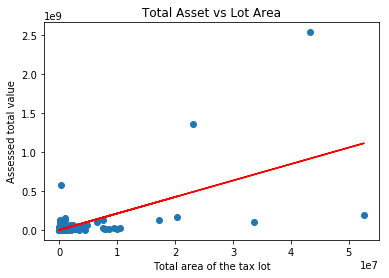

In [18]:
#Visualizing the model 

plt.figure()
plt.scatter("LotArea","AssessTot",data=data_4)
plt.plot(data_4["LotArea"],data_4.pred,c="r")
plt.xlabel('Total area of the tax lot')
plt.ylabel('Assessed total value')
plt.title("Total Asset vs Lot Area")
plt.show()

#[data_4["LotArea"]<20000]

#### (d) Repeat (c) without intercept, i.e. with $w_2=0$.

In [19]:
#Adding (-1) to the formulae forces the model to not include an intercept.
lm1 = smf.ols(formula="AssessTot ~ LotArea -1", data = data_4).fit()
lm1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AssessTot   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                 1.727e+05
Date:                Sun, 08 Oct 2017   Prob (F-statistic):               0.00
Time:                        11:30:53   Log-Likelihood:            -4.6214e+06
No. Observations:              275942   AIC:                         9.243e+06
Df Residuals:                  275941   BIC:                         9.243e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LotArea       21.1740      0.051    415.561      0.000      21.074      21.274
==============================================================================
Omnibus:                  1261079.995   Durbin-Watson:                   2.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   60228167169598.078
Skew:                         157.128   Prob(JB):                         0.00
Kurtosis:                   72378.645   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

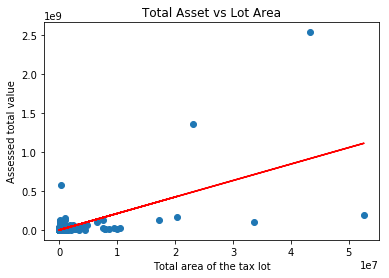

In [20]:
#extracting parameters from the new model
intercept1=lm1.params[0]

#creating predicted values when there is no intercept
data_4.loc[:,"pred_nointercept"]=(slope*data_4["LotArea"])+intercept1

#Visualizing graph
plt.figure()
plt.scatter("LotArea","AssessTot",data=data_4)
plt.plot(data_4["LotArea"],data_4.pred_nointercept,c="r")
plt.xlabel('Total area of the tax lot')
plt.ylabel('Assessed total value')
plt.title("Total Asset vs Lot Area")
plt.show()



### Question (5): (20pt)

For the same data as above try the model: log_AssessTot=$w_1$*log_LotArea + $w_2$. 

Get $w_1$, $w_2$ and $R^2$.  And plot your results together with observations. Explain the result - what does the estimated "$w_1$" means to you?

In [21]:
#This new model takes the values of x and y and applies a log function.
lm_log = smf.ols(formula="np.log(AssessTot) ~ np.log(LotArea)", data = data_4).fit()
lm_log.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(AssessTot)   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 2.659e+05
Date:                Sun, 08 Oct 2017   Prob (F-statistic):               0.00
Time:                        11:31:00   Log-Likelihood:            -3.4454e+05
No. Observations:              275942   AIC:                         6.891e+05
Df Residuals:                  275940   BIC:                         6.891e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2088      0.020     10.345      0.000       0.169       0.248
np.log(LotArea)     1.3250      0.003    515.625      0.000       1.320       1.330
==============================================================================
Omnibus:                    29138.667   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197341.462
Skew:                           0.276   Prob(JB):                         0.00
Kurtosis:                       7.106   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

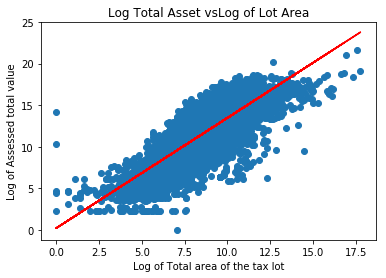

In [22]:
#extracting parameters from the LOGARITMIC model.
intercept_log=lm_log.params[0]
slope_log=lm_log.params[1]

#creating predicted values
data_4.loc[:,"pred_log"]=slope_log*np.log(data_4["LotArea"])+intercept_log

#Visualizing graph
plt.figure()
plt.scatter(np.log(data_4["LotArea"]),np.log(data_4["AssessTot"]))
plt.plot(np.log(data_4["LotArea"]),data_4.pred_log,c="r")
plt.xlabel('Log of Total area of the tax lot')
plt.ylabel('Log of Assessed total value')
plt.title("Log Total Asset vsLog of Lot Area")
plt.show()



In [23]:
print "The slope(w1) is 1.3250"
print "The R**2=0.491"

The slope(w1) is 1.3250
The R**2=0.491


Explain the result - what does the estimated " w1 " means to you?

The w1 means that for each 1% of increment in the area of the tax lot, the assessed total value increases 1.32%